 **Assignment 05
Artificial Neural Networks**

Bob has started his own mobile company. He wants to give tough fight to big companies
like Apple, Samsung etc. He does not know how to estimate price of mobiles his company
creates. In this competitive mobile phone market, you cannot simply assume things. To
solve this problem, he collects sales data of mobile phones of various companies. Bob
wants to find out some relation between features of a mobile phone (eg:- RAM, Internal
Memory etc) and its selling price. But he is not so good at Machine Learning. Create an
artificial neural network-based classifier to help Bob. Data and class labels are available
in mobile_price_classification.csv file. Use price_range column as label and remaining
columns as data.
Also do the hyperparmeter tuning.

Exploratory Data Analysis

In [1]:
#Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
#Add Dataset
mobile_price_classification=pd.read_csv('/content/mobile_price_classification.csv')

In [3]:
mobile_price_classification

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
#Shape of dataset
mobile_price_classification.shape

(2000, 21)

In [5]:
#Columns in dataset
mobile_price_classification.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
#General Information
mobile_price_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [7]:
#Statistical Information
mobile_price_classification.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Data Preprocessing

In [8]:
#Null value Detection
mobile_price_classification.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


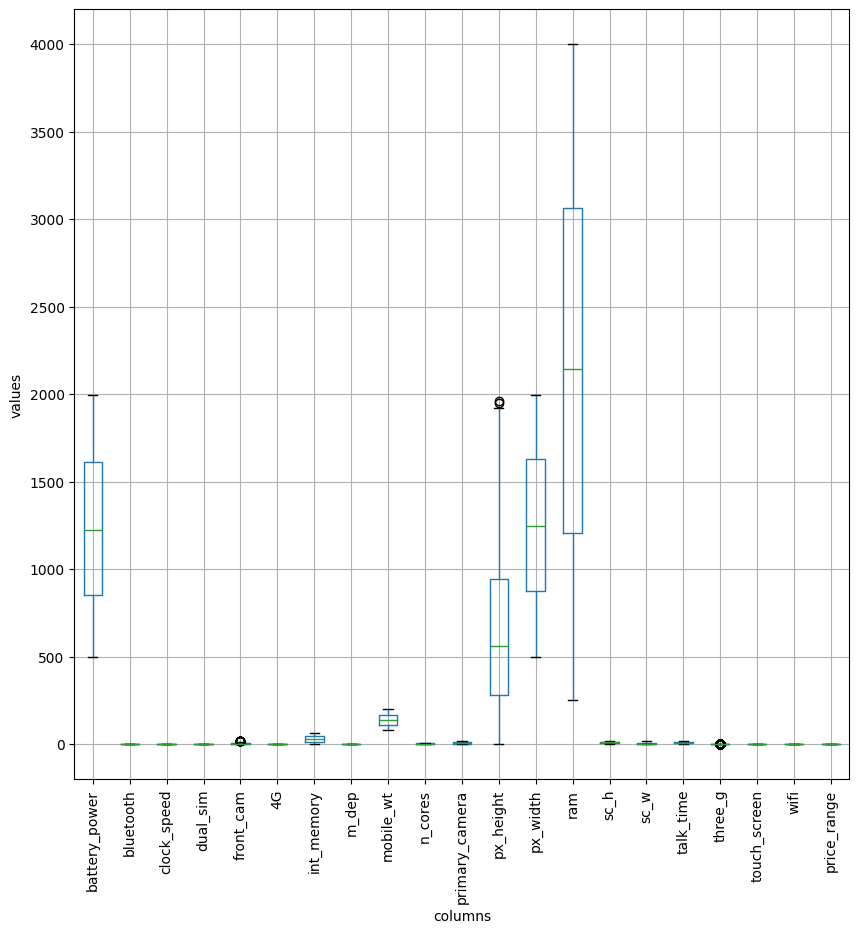

In [9]:
#Outlier Detection
#Create boxplot for outlier Detection
plt.figure(figsize=(10,10))
mobile_price_classification.boxplot()
plt.xlabel('columns')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.show()

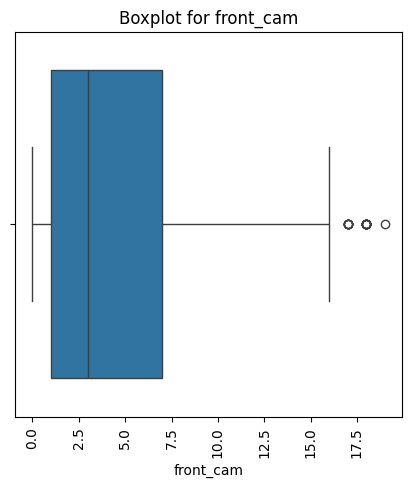

In [10]:
#Before outlier Treatment front_cam
plt.figure(figsize=(5,5))
sns.boxplot(x=mobile_price_classification['front_cam'],data=mobile_price_classification)
plt.title('Boxplot for front_cam')
plt.xticks(rotation=90)
plt.show()

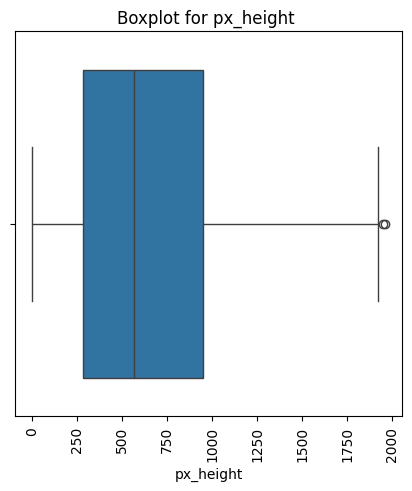

In [11]:
#Before Outlier Treatment px_height
plt.figure(figsize=(5,5))
sns.boxplot(x=mobile_price_classification['px_height'],data=mobile_price_classification)
plt.title('Boxplot for px_height ')
plt.xticks(rotation=90)
plt.show()

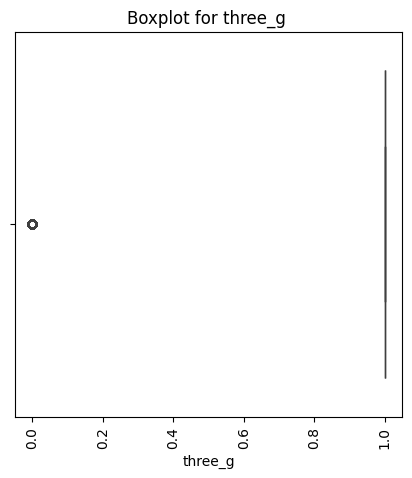

In [12]:
#Before Outlier Treatment three_g
plt.figure(figsize=(5,5))
sns.boxplot(x=mobile_price_classification['three_g'],data=mobile_price_classification)
plt.title('Boxplot for three_g ')
plt.xticks(rotation=90)
plt.show()

In [13]:
#Apply IQR method
cols=['front_cam','px_height','three_g']
for c in cols:
    Q1=mobile_price_classification[c].quantile(0.25)
    Q3=mobile_price_classification[c].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    mobile_price_classification[c]=np.where(mobile_price_classification[c]<lower_bound,lower_bound,mobile_price_classification[c])
    mobile_price_classification[c]=np.where(mobile_price_classification[c]>upper_bound,upper_bound,mobile_price_classification[c])

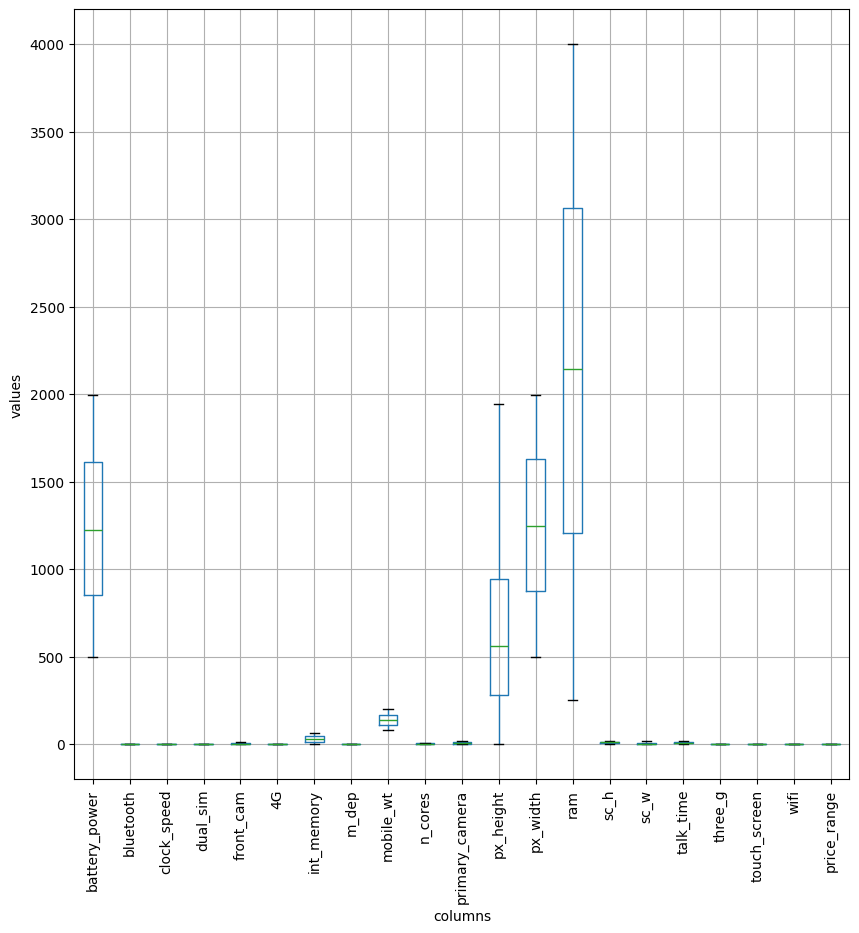

In [14]:
#Create boxplot After outlier Detection
plt.figure(figsize=(10,10))
mobile_price_classification.boxplot()
plt.xlabel('columns')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.show()

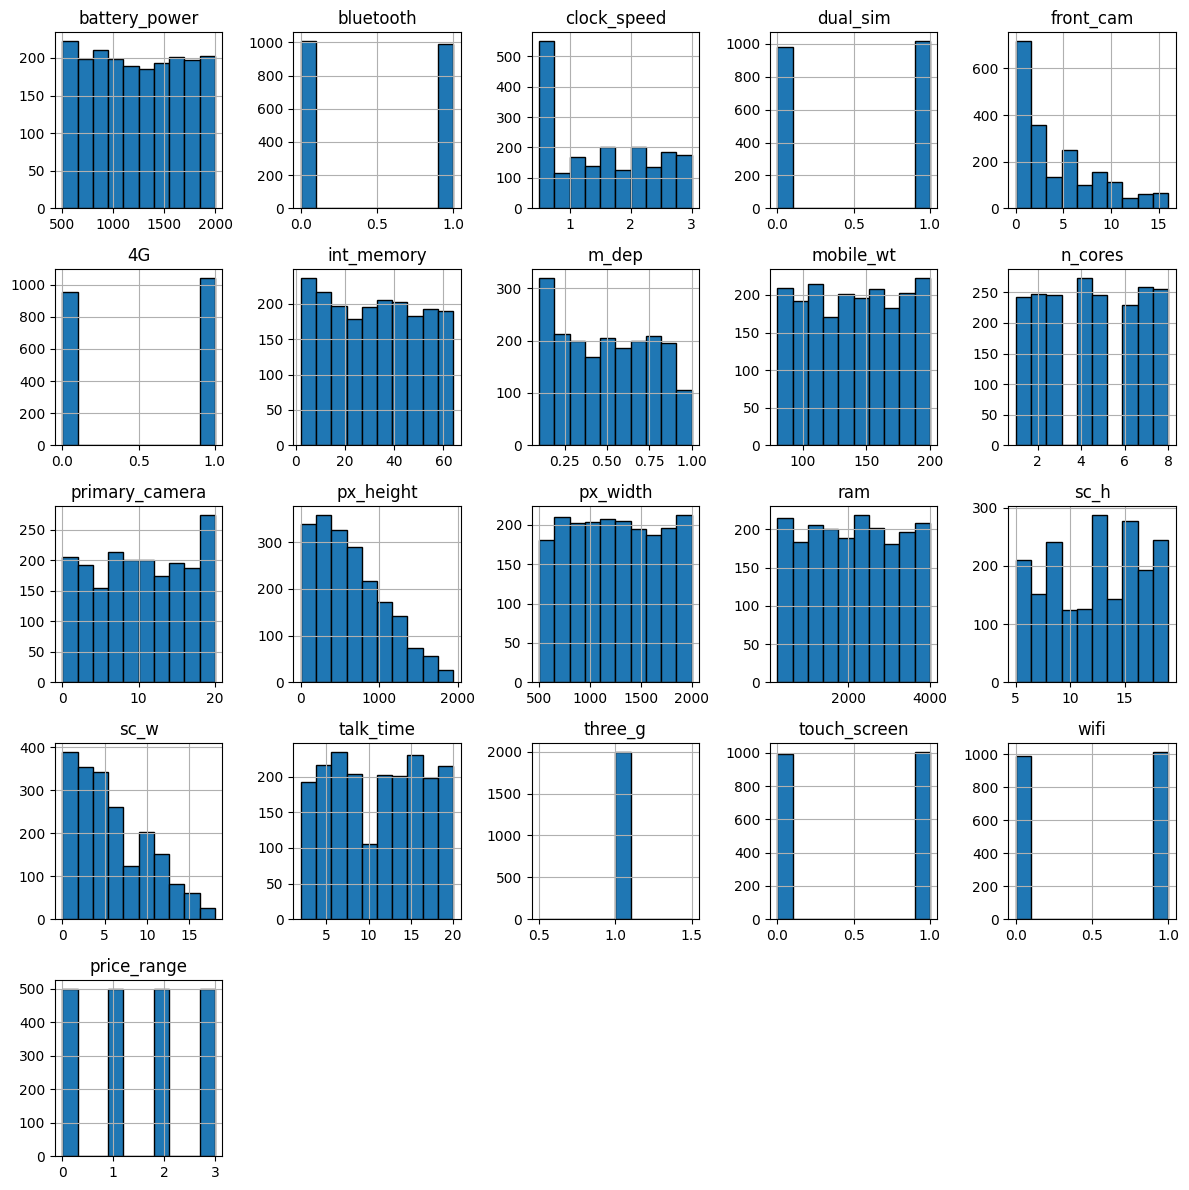

In [15]:
mobile_price_classification.hist(figsize=(12,12),edgecolor='black')
plt.tight_layout()
plt.show()

In [16]:
X,y=mobile_price_classification.values[:,:-1],mobile_price_classification.values[:,-1]



In [17]:
print(X.shape)

(2000, 20)


In [18]:
print(y.shape)

(2000,)


In [19]:

#y is a 1D array of labels.so reshape y
y = y.reshape(-1,1)

In [20]:
print(y.shape)

(2000, 1)


In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
y = onehot_encoder.fit_transform(y)

In [22]:
y = y.toarray()

In [23]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1340, 20) (660, 20) (1340, 4) (660, 4)


In [25]:
n_features=X_train.shape[1]
model=Sequential()
#Layer 1:Input+Hidden
model.add(Dense(16,input_shape=(n_features,),activation='relu'))#we start the neurons 16.beauce of multiple of 2
#Layer 2:Hidden
model.add(Dense(12,activation='relu'))

#Layer 3:Output layer(3 classes)
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
    loss='categorical_crossentropy',#here we work in classification so use categorical cross entropy and use metrics is accuracy
    optimizer='adam',
    metrics=['accuracy'])

In [28]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    verbose=1
)



Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2340 - loss: 1.5616 - val_accuracy: 0.2276 - val_loss: 1.4801
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2737 - loss: 1.4327 - val_accuracy: 0.2425 - val_loss: 1.4225
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2820 - loss: 1.3842 - val_accuracy: 0.2575 - val_loss: 1.3825
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3195 - loss: 1.3569 - val_accuracy: 0.3209 - val_loss: 1.3507
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3389 - loss: 1.3262 - val_accuracy: 0.3321 - val_loss: 1.3208
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3800 - loss: 1.2943 - val_accuracy: 0.3694 - val_loss: 1.2903
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4083 - loss: 1.2617 - val_accuracy: 0.3769 - val_loss: 1.2572
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4505 - loss: 1.2166 - val_accuracy: 0.4179 - 

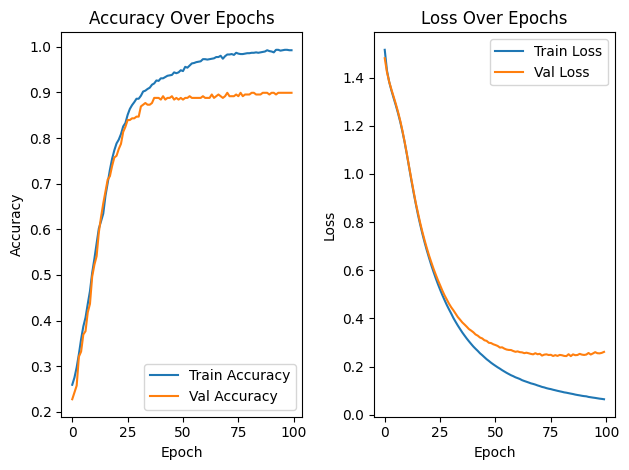

In [29]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Evaluate the model on Test Data
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"Test accuracy:{test_accuracy:.2f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9301 - loss: 0.1890 
Test accuracy:0.92


In [31]:
X_test[1]

array([ 1.05730181,  1.0100505 , -1.2530642 , -1.01918398,  0.16437924,
        0.95788598, -0.49867214, -1.04649512, -1.36332026,  0.6468425 ,
       -0.48104847, -1.15205731, -1.69065047, -1.22753443, -1.25979551,
       -0.63531667,  1.09636657,  0.        ,  0.99401789, -1.01409939])

In [32]:
predict=[0.74772426, -0.9900495 ,  0.70820038,  0.98117712, -0.30128432,
       -1.04396559, -0.55379535,  1.03435682,  0.36029134, -0.66476784,
        1.49823547, -1.02582854,  0.17238136,  1.72139643,  0.63945335,
       -0.86492153, -0.18507707,  0.        , -1.00601811, -1.01409939]
y_predict=model.predict(np.array([predict]))
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


array([[5.0974965e-22, 5.3334381e-10, 7.7845459e-04, 9.9922156e-01]],
      dtype=float32)

##Hyper Parameter Tuning ##

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2119 - loss: 1.6124 - val_accuracy: 0.1866 - val_loss: 1.6291
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2229 - loss: 1.5785 - val_accuracy: 0.1940 - val_loss: 1.6152
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2201 - loss: 1.5701 - val_accuracy: 0.1940 - val_loss: 1.6022
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2142 - loss: 1.5666 - val_accuracy: 0.2015 - val_loss: 1.5901
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2195 - loss: 1.5460 - val_accuracy: 0.1903 - val_loss: 1.5784
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2333 - loss: 1.5280 - val_accuracy: 0.1940 - val_loss: 1.5678
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2203 - loss: 1.5630 - val_accuracy: 0.1978 - val_loss: 1.5571
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2131 - loss: 1.5451 - val_accuracy: 0.1903 - val_loss

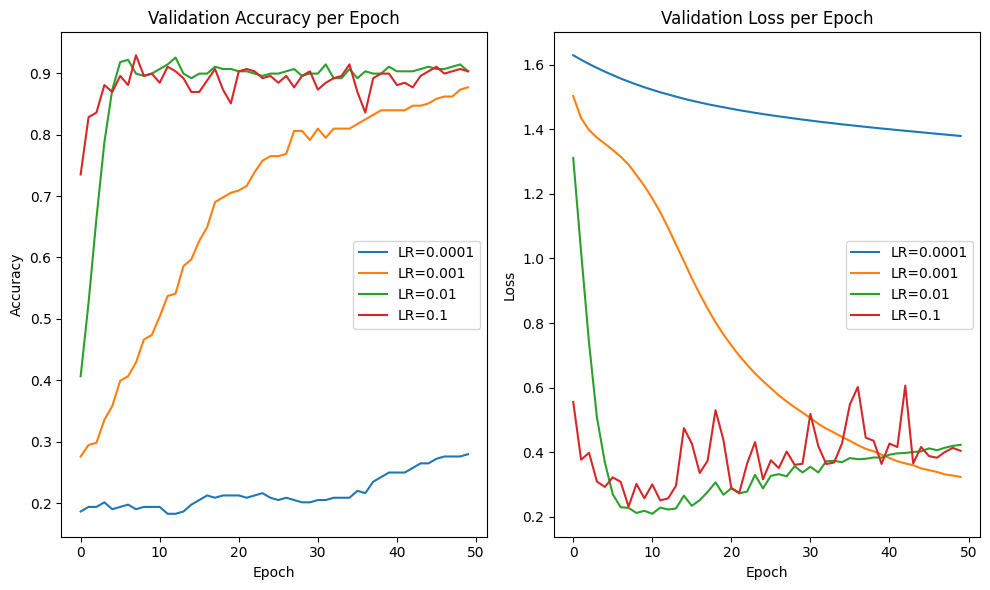

In [33]:
from tensorflow.keras.optimizers import Adam
# Function to build and train model
n_features=X_train.shape[1]

def train_model_with_lr(learning_rate):
    model = Sequential()
    model.add(Dense(16, input_shape=(n_features,), activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1)
    return history

# Try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    histories[lr] = train_model_with_lr(lr)

# Plot validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_accuracy'], label=f'LR={lr}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_loss'], label=f'LR={lr}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
# Evaluate the model on Test Data
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test accuracy:{test_accuracy:.2f}")

Test accuracy:0.92


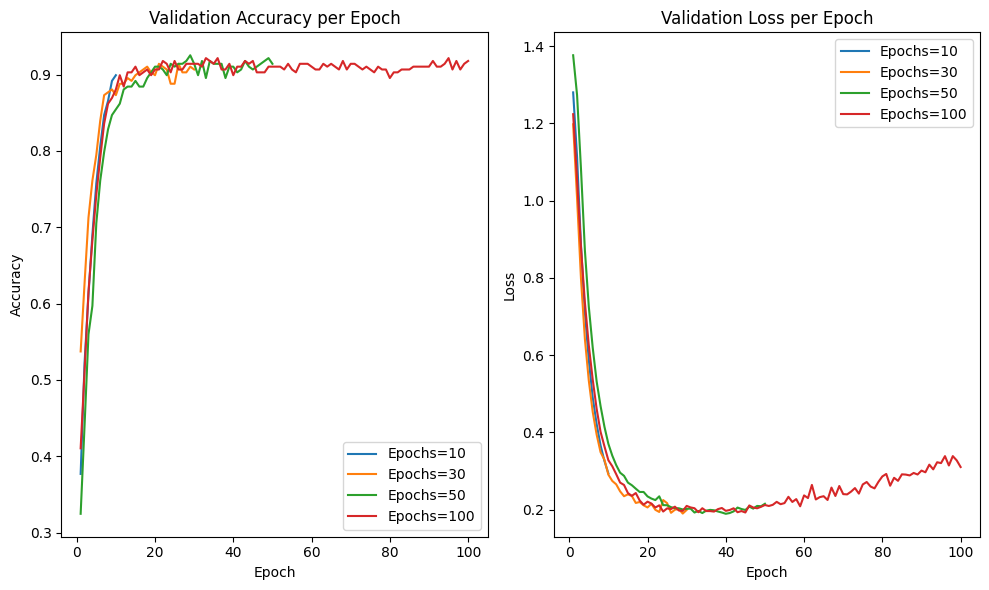

In [35]:
# Train model with a given number of epochs
n_features=X_train.shape[1]
def train_model_with_epochs(num_epochs):

    model = Sequential()
    model.add(Dense(16, input_shape=(n_features,), activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=num_epochs, batch_size=8, verbose=0)
    return history

# Test different epoch values
epoch_values = [10, 30, 50, 100]
histories = {}

for num_epochs in epoch_values:
    histories[num_epochs] = train_model_with_epochs(num_epochs)

# Plotting validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for num_epochs in epoch_values:
    val_acc = histories[num_epochs].history['val_accuracy']
    plt.plot(range(1, len(val_acc)+1), val_acc, label=f'Epochs={num_epochs}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for num_epochs in epoch_values:
    val_loss = histories[num_epochs].history['val_loss']
    plt.plot(range(1, len(val_loss)+1), val_loss, label=f'Epochs={num_epochs}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
# Evaluate the model on Test Data
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print(f"Test accuracy:{test_accuracy:.2f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9301 - loss: 0.1890 
Test accuracy:0.92


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2370 - loss: 1.5833 - val_accuracy: 0.3022 - val_loss: 1.4793
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2543 - loss: 1.4950 - val_accuracy: 0.3022 - val_loss: 1.4110
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2617 - loss: 1.4452 - val_accuracy: 0.3134 - val_loss: 1.3716
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3070 - loss: 1.3762 - val_accuracy: 0.3134 - val_loss: 1.3448
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3273 - loss: 1.3443 - val_accuracy: 0.3321 - val_loss: 1.3183
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3595 - loss: 1.3125 - val_accuracy: 0.3881 - val_loss: 1.2924
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3769 - loss: 1.2689 - val_accuracy: 0.4179 - val_loss: 1.2622
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3983 - loss: 1.2489 - val_accuracy: 0.4590 - 

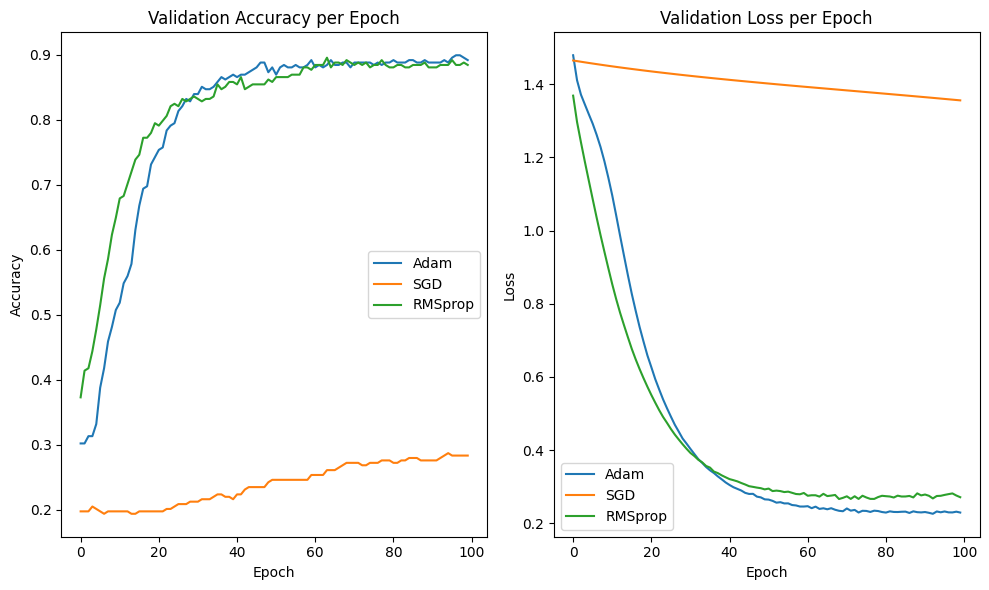

In [37]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
n_features=X_train.shape[1]

# Train model with a given optimizer
def train_model_with_optimizer(optimizer):
    model = Sequential()
    model.add(Dense(16, input_shape=(n_features,), activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)
    return history

# Try different optimizers
optimizers = {
    "Adam": Adam(learning_rate=0.001),
    "SGD": SGD(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001)
}

histories = {name: train_model_with_optimizer(opt) for name, opt in optimizers.items()}

# Plot results
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for name in histories:
    plt.plot(histories[name].history['val_accuracy'], label=name)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for name in histories:
    plt.plot(histories[name].history['val_loss'], label=name)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Evaluate the model on Test Data
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"Test accuracy:{test_accuracy:.2f}")

Test accuracy:0.92


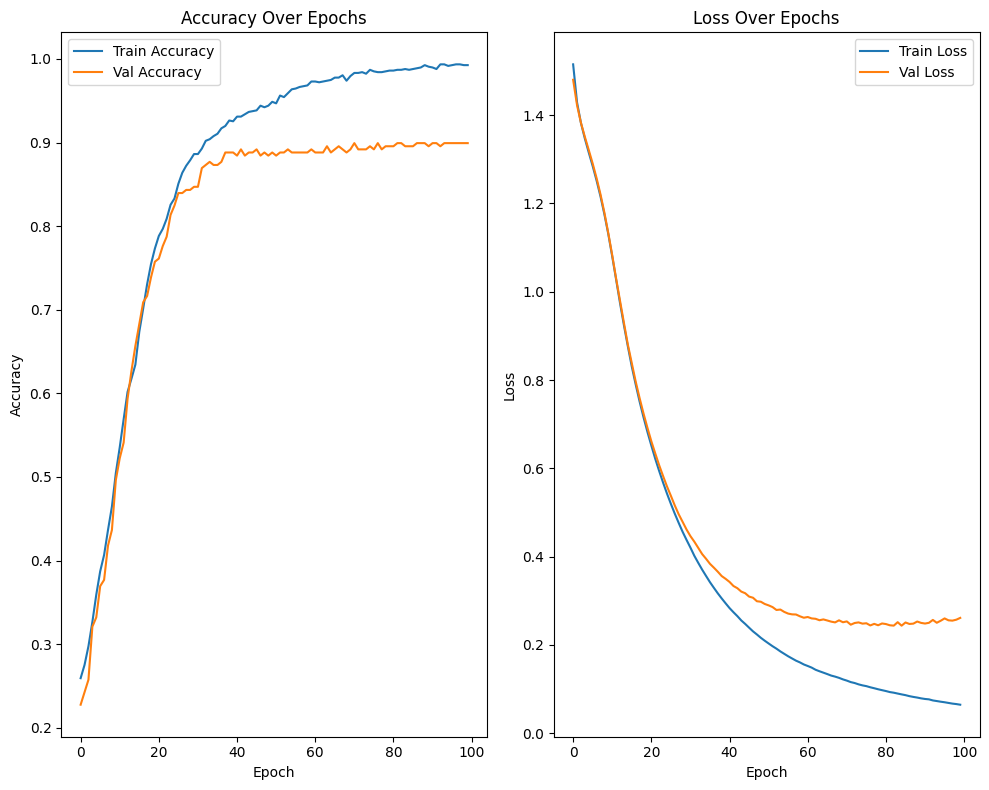

In [39]:
# Accuracy plot
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()